<a href="https://colab.research.google.com/github/priyagupta9103/Student-Performance-EDA./blob/main/Retail_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Supermart Grocery Sales - Retail Analytics Dataset.csv to Supermart Grocery Sales - Retail Analytics Dataset.csv


In [15]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [16]:
df.shape

(9994, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [18]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [19]:
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


**Data Cleaning**

(A) Missing Value Handle

In [20]:
num_col = df.select_dtypes(include=['int64','float']).columns
df[num_col] = df[num_col].fillna(df[num_col].median())

# Categorical  coloumns ke missing values fill

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


Duplicate Rows Remove

In [22]:
df.drop_duplicates(inplace=True)

In [33]:
import numpy as np
num_col = df.select_dtypes(include=['int64','float64']).columns
for col in num_col:
  Q1 =df[col].quantile(0.25)
Q3 =df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper= Q3 + 1.5 * IQR
df[col]= np.where(df[col]<lower,lower,df[col])
df[col]=np.where(df[col]>upper,upper,df[col])

EDA

Categorial Column Countplots

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

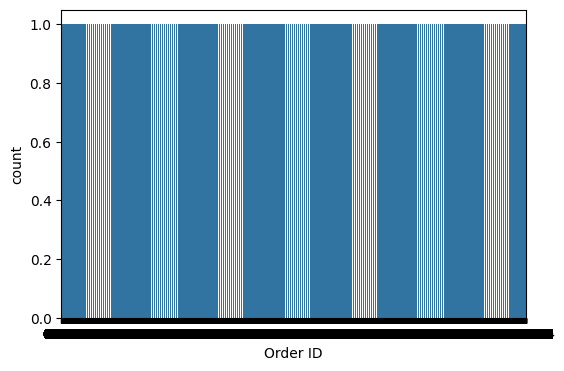

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data= df,x = col)

  plt.xtricks(rotation=45)
  plt.show()

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

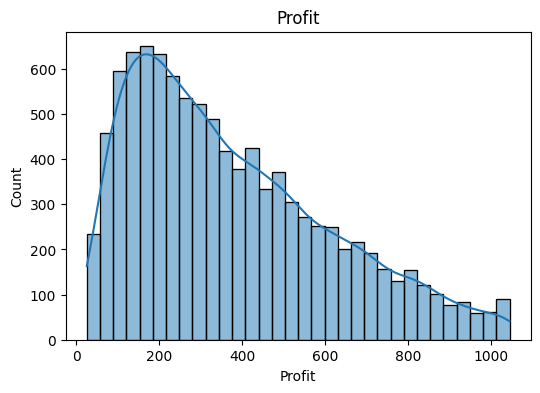

In [35]:
for col in num_col:
 plt.figure(figsize=(6,4))
sns.histplot(df[col],kde=True)
plt.title(col)
plt.show()

Correlation Heatmap

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(corr(),
annot = True,cmap = 'coolwarm')
plt.show()

NameError: name 'corr' is not defined

<Figure size 800x600 with 0 Axes>

In [47]:
df.groupby('Category')
['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Sales by Category")
plt.show()

KeyError: 'Product line'

In [46]:
df.groupby('City')
['Total'].sum().plot(kind='bar')
plt.title("Sales by City")
plt.show()

AttributeError: 'list' object has no attribute 'sum'